# Thermal Sunyaev Zeldovich Power Spectrum Calculation<a id = 'cl_sz'></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
import numpy as np
import os
from classy_sz import Class as Class_sz

**Cosmological parameters**

In [2]:
cosmo_params= {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665, 
"cosmo_model": 1, # use mnu-lcdm emulators
}

**Precision parameters**

In [4]:
precision_params = {
'x_outSZ': 4., # truncate profile beyond x_outSZ*r_s

'n_m_pressure_profile' :50, # default: 100, decrease for faster
'n_z_pressure_profile' :50, # default: 100, decrease for faster
    

'use_fft_for_profiles_transform' : 1, # use fft's or not. 
# only used if use_fft_for_profiles_transform set to 1
'N_samp_fftw' : 512,
'x_min_gas_pressure_fftw' : 1e-4,
'x_max_gas_pressure_fftw' : 1e4,
    
    
'ndim_redshifts' :30,

    
'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0001,    

    
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0001
}

**Explicit calculations with FFTs**

In [6]:
%%time

classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({

'output': 'tSZ_tSZ_1h,tSZ_tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M500c',



'pressure profile':'custom_gnfw', # can be Battaglia, Arnaud, etc
    
"P0GNFW": 8.130,
"c500": 1.156,
"gammaGNFW": 0.3292,
"alphaGNFW": 1.0620,
"betaGNFW":5.4807,
    



})
classy_sz.compute_class_szfast()

CPU times: user 4.06 s, sys: 692 ms, total: 4.75 s
Wall time: 600 ms


In [8]:
l = np.asarray(classy_sz.cl_sz()['ell'])
cl_yy_1h = np.asarray(classy_sz.cl_sz()['1h'])
cl_yy_2h = np.asarray(classy_sz.cl_sz()['2h'])

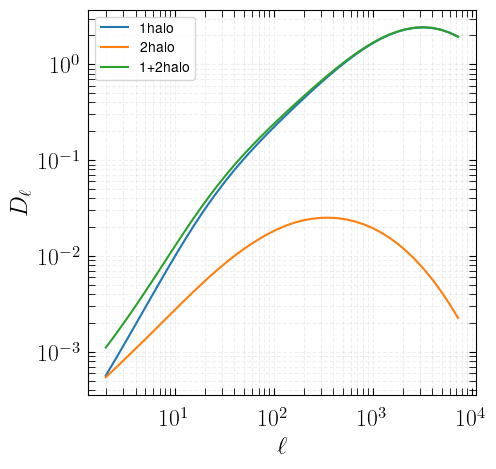

In [9]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
ax.legend()

**calculation with Arnaud et 2010 tabulated profile**

In [10]:
%%time
classy_sz_A10 = Class_sz()
classy_sz_A10.set(cosmo_params)
classy_sz_A10.set(precision_params)
classy_sz_A10.set({

'output': 'tSZ_1h,tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M500c',

'pressure_profile':'A10', # can be Battaglia, Arnaud, etc

})
classy_sz_A10.compute_class_szfast()

/Users/boris/Work/CLASS-SZ/SO-SZ/mcfit/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


CPU times: user 3.95 s, sys: 1.12 s, total: 5.07 s
Wall time: 625 ms


In [8]:
l_A10 = np.asarray(classy_sz_A10.cl_sz()['ell'])
cl_yy_1h_A10 = np.asarray(classy_sz_A10.cl_sz()['1h'])
cl_yy_2h_A10 = np.asarray(classy_sz_A10.cl_sz()['2h'])

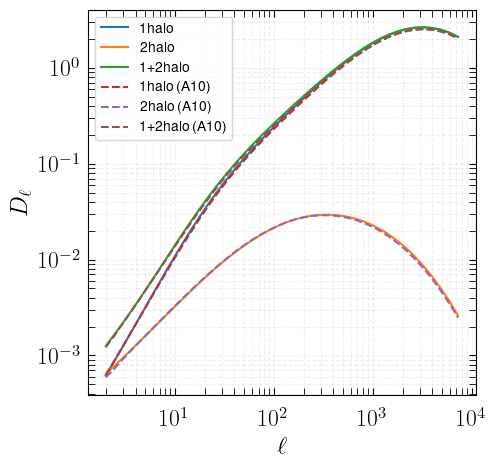

In [9]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')

ax.plot(l_A10,cl_yy_1h_A10,label='1halo (A10)',ls='--')
ax.plot(l_A10,cl_yy_2h_A10,label='2halo (A10)',ls='--')
ax.plot(l_A10,cl_yy_2h_A10+cl_yy_1h_A10,label='1+2halo (A10)',ls='--')
ax.legend()

**calculation with Battaglia et al 2012 profile (FFTs)**

Not doing in fast mode here to match precisely hmpdf settings

In [10]:
%%time
h = 0.674
omega_b = 0.0224
Omega_m=0.315
sigma8=0.811
N_ur = 3.046
n_s = 0.965
tau_reio=0.054
N_ncdm=0
m_ncdm=0

Mclass_sz = Class_sz()

Mclass_sz.set({

'h': h,
'sigma8': sigma8,
'n_s': n_s,
'tau_reio': tau_reio,
'omega_b': omega_b,
'omega_cdm':  0.1207,#Omega_m*h**2-omega_b,  
'N_ur': 3.046,


'output': 'tSZ_1h',

'pressure_profile':'B12',
'delta_for_electron_pressure':'200c',
"concentration_parameter":"D08",
"ell_min" : 125,
"ell_max" : 9725,
'dell': 200,
'dlogell': 0.,
    
'M_min' : 1e11*h, 
'M_max' : 1e16*h,

'z_min': 0.005,
'z_max': 6.,
    
    
'n_z_pressure_profile': 500,
'n_m_pressure_profile' : 500,
'n_l_pressure_profile' : 500,
    
'l_min_gas_pressure_profile' :  1.e-2,
'l_max_gas_pressure_profile' :  5.e4,    

'pressure_profile_epsrel':1e-4,
'pressure_profile_epsabs':1e-100,
    

    
    
'hm_consistency' : 0,
    

'use_fft_for_profiles_transform' : 1,
'x_min_gas_pressure_fftw' : 1e-5,
'x_max_gas_pressure_fftw' : 1e5,
'N_samp_fftw' : 8192,
    
    
# 'ndim_masses' : 500,
# 'ndim_redshifts' :100,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,    
    

'truncate_gas_pressure_wrt_rvir' : 1,
'x_outSZ': 2.,
'mass_function' : 'T10M200m',
'T10_alpha_fixed' : 1,
    
    
'P_k_max_h/Mpc': 10.,
'k_per_decade_class_sz':80.,
'k_min_for_pk_class_sz':1e-4,
'k_max_for_pk_class_sz': 10*h, 
    
'classy_sz_verbose': 'none'

})
Mclass_sz.compute()

CPU times: user 10min 12s, sys: 4.54 s, total: 10min 16s
Wall time: 1min 7s


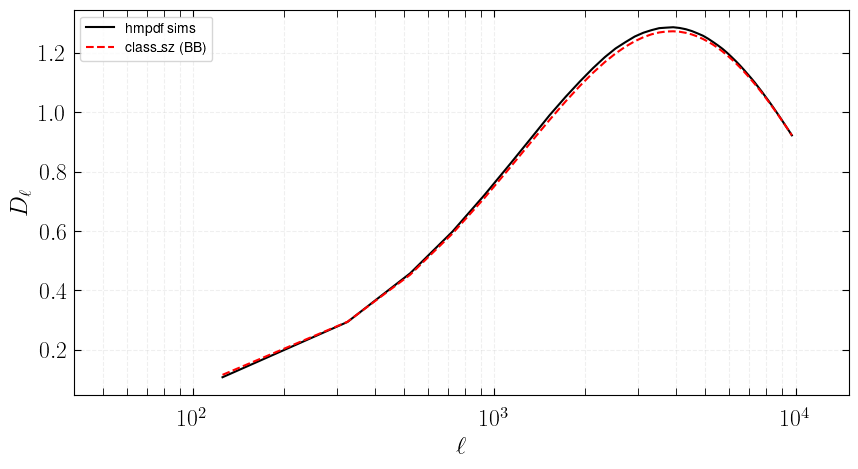

In [11]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xscale('log')

df_hs_ls = np.loadtxt("/Users/boris/halosky_sims_tllp/hmpdf_sim_yy_NG_cov_ells_coarse_08Mar24.txt")
df_hs = np.loadtxt("/Users/boris/halosky_sims_tllp/hmpdf_sim_yy_PS_coarse_08Mar24.txt")
ax.plot(df_hs_ls,df_hs,label='hmpdf sims',c='k')

l = np.asarray(Mclass_sz.cl_sz()['ell'])
dl_yy_1h = np.asarray(Mclass_sz.cl_sz()['1h'])
ax.plot(l,dl_yy_1h,label='class_sz (BB)',c='r',ls='--')

# alina = np.load("/Users/boris/halosky_sims_tllp/cl_class_sz.npy", allow_pickle=True).flatten()[0]
# ax.plot(alina['ell'],alina['1h'],label='class_sz (AS)',c='g',ls='-.')

plt.xlim(40,1.5e4)
ax.legend()

In [12]:
# Check if the result is approximately close to 51
import pytest
result_sum = np.asarray(Mclass_sz.cl_sz()['1h']).sum()
print(result_sum)
assert result_sum == pytest.approx(51.7, rel=1e-1), f"Sum of '1h' values is {result_sum}, expected close to 51"

51.60100562228009


In [13]:
df_hs.sum()

52.00280352118555